<a href="https://colab.research.google.com/github/Sreeya22/Credit-Card-Fraud-Detection-Using-ANN/blob/main/ccfd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [3]:
data = pd.read_csv('/content/creditcard.csv')

In [4]:
# Display column headings
print("Column Headings:\n", data.columns)

# Data Cleaning
# Check for and handle missing values
print("\nMissing values per column:\n", data.isnull().sum())
data = data.dropna()  # Drop rows with missing values (you can use data.fillna() to fill them instead)

# Display basic dataset information
print("\nDataset Info:")
print(data.info())

Column Headings:
 Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'class'],
      dtype='object')

Missing values per column:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
class     0
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-n

In [7]:
# Define features and target
X = data.drop(['class'], axis=1)
y = data['class']

# Check and remove rows with NaN in y
if y.isnull().sum() > 0:
    X = X[y.notnull()]
    y = y[y.notnull()]

# Standard scaling for 'Time' and 'Amount' columns
scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

# Balancing Data with SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Proceed with train-test split and model training as before...


In [8]:
#check for null values
print(y.isnull().sum())

0


In [9]:
# Remove rows where y is NaN
X = X[y.notnull()]
y = y[y.notnull()]

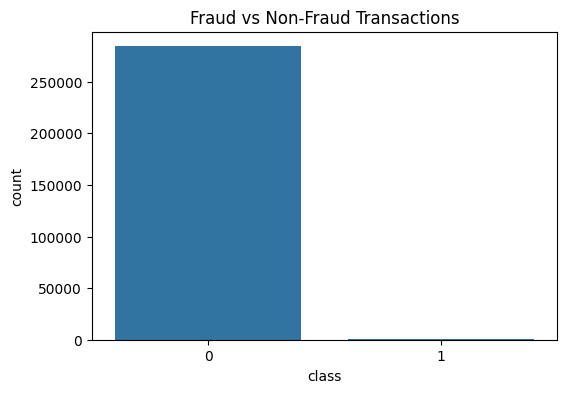

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=data)
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()

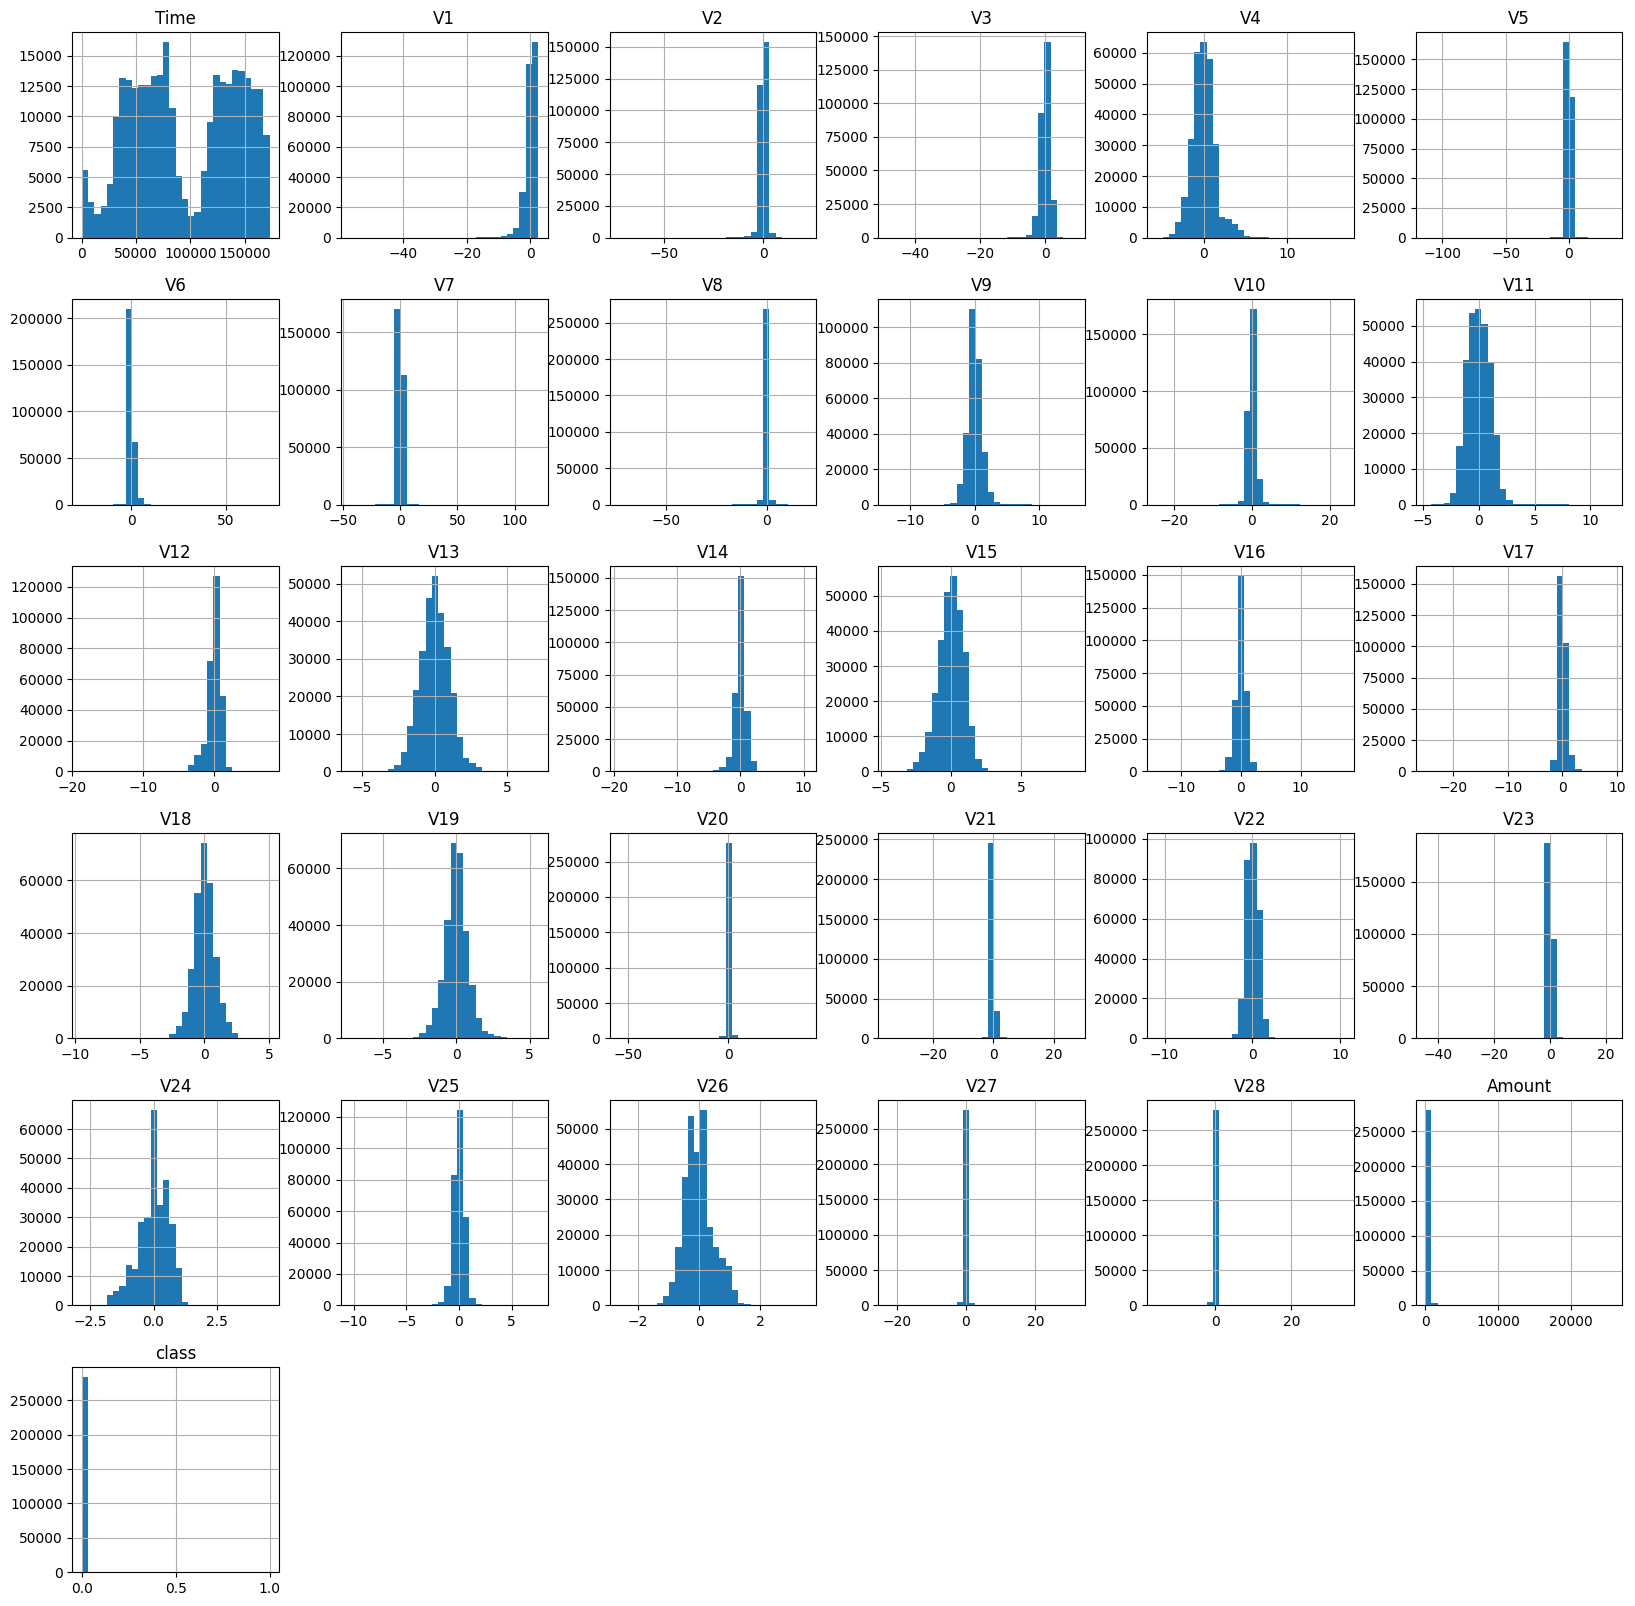

In [11]:
data.hist(figsize=(20, 20), bins=30)
plt.show()

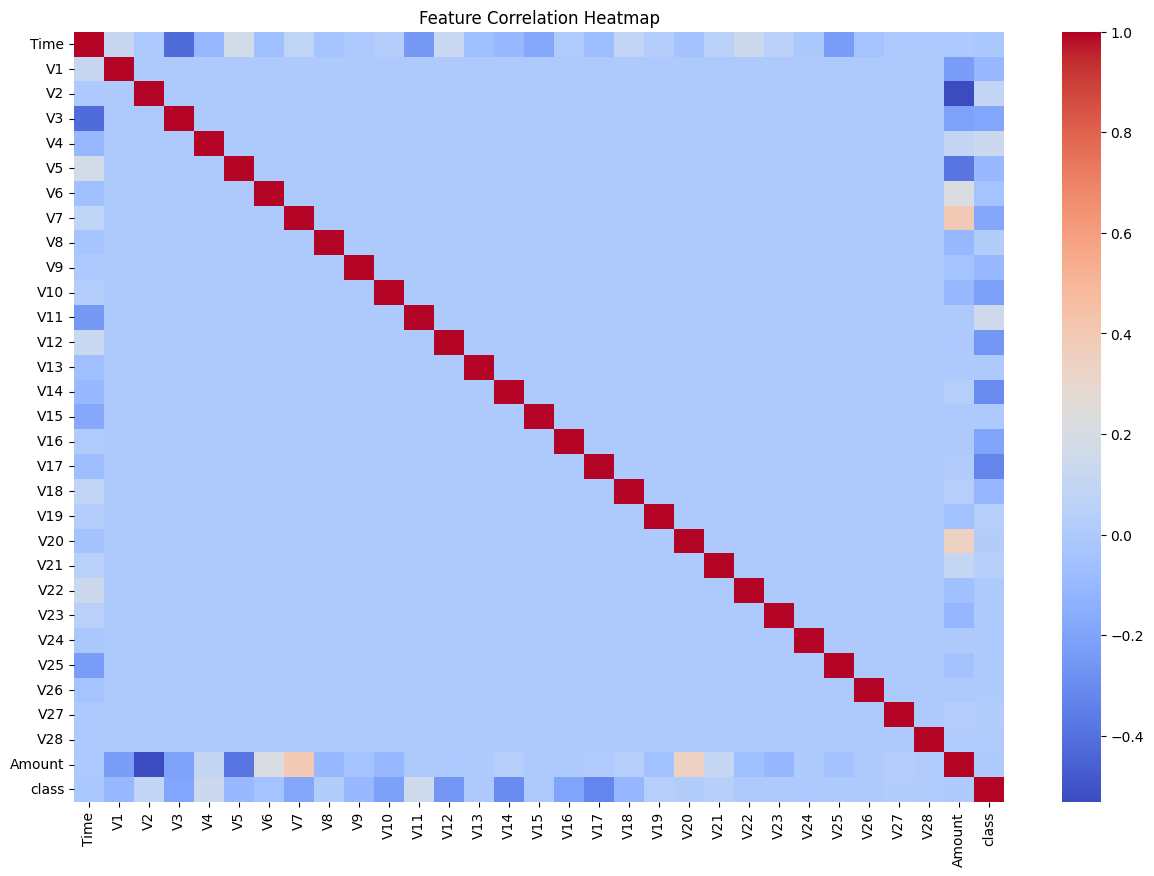

In [12]:
# Correlation Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), cmap="coolwarm", annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

In [13]:
fraud_data = data[data['class'] == 1]
non_fraud_data = data[data['class'] == 0]

In [14]:
X = data.drop(['class'], axis=1)
y = data['class']
scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

In [15]:
# Balancing Data with SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# ANN Model
ccfd = Sequential([
    Dense(32, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

ccfd.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = ccfd.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.9586 - loss: 0.1000 - val_accuracy: 0.9972 - val_loss: 0.0126
Epoch 2/50
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.9941 - loss: 0.0204 - val_accuracy: 0.9975 - val_loss: 0.0083
Epoch 3/50
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9963 - loss: 0.0136 - val_accuracy: 0.9987 - val_loss: 0.0062
Epoch 4/50
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.9968 - loss: 0.0113 - val_accuracy: 0.9991 - val_loss: 0.0045
Epoch 5/50
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - accuracy: 0.9973 - loss: 0.0100 - val_accuracy: 0.9990 - val_loss: 0.0047
Epoch 6/50
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.9975 - loss: 0.0096 - val_accuracy: 0.9990 - val_loss: 0.0046
Epoch 7/50
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9976 - loss: 0.0094 - val_accuracy: 0.9992 - val_loss: 0.0042
Epoch 8/50
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 

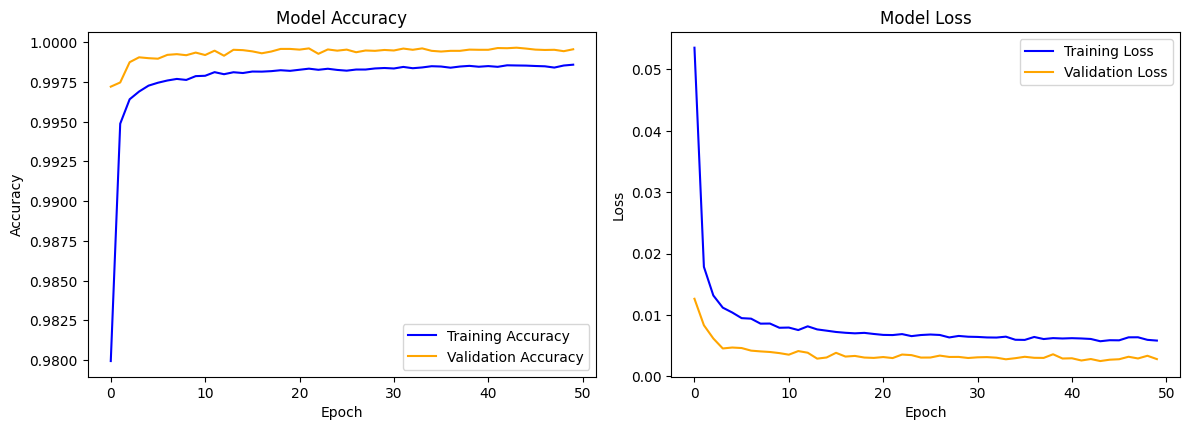

In [16]:
# Imports for plotting
import matplotlib.pyplot as plt

# Access history
history_dict = history.history

# Plotting Accuracy
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(history_dict['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(2, 2, 2)
plt.plot(history_dict['loss'], label='Training Loss', color='blue')
plt.plot(history_dict['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Adjust layout and show plots
plt.tight_layout()
plt.show()


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Make predictions on the test set for ANN
y_pred_ann = (ccfd.predict(X_test) > 0.5).astype(int)  # Threshold at 0.5 for binary classification

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_ann)
precision = precision_score(y_test, y_pred_ann)
recall = recall_score(y_test, y_pred_ann)

# Print results
print("ANN Model Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ann))

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
ANN Model Results:
Accuracy: 0.9994
Precision: 0.9987
Recall: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

